# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
pip install api

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



from matplotlib.dates import DateFormatter

#import openweathermapy as owm
from datetime import datetime

# Import API key
from api_keys import api_key


# Import API key
import api_keys


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['arraial%20do%20cabo',
 'kapaa',
 'gollere',
 'provideniya',
 'ushuaia',
 'ponta%20do%20sol',
 'cape%20town',
 'tadine',
 'conde',
 'bluff',
 'bredasdorp',
 'taksimo',
 'punta%20arenas',
 'saint-philippe',
 'kandrian',
 'avarua',
 'rikitea',
 'port%20alfred',
 'pardina',
 'colac',
 'kumbo',
 'beaverlodge',
 'hithadhoo',
 'port%20blair',
 'ukiah',
 'la%20reforma',
 'tumut',
 'svetlyy',
 'pata',
 'honiara',
 'khatanga',
 'plettenberg%20bay',
 'mareeba',
 'pionerskiy',
 'talara',
 'pallasovka',
 'tsihombe',
 'albany',
 'hermanus',
 'chokurdakh',
 'tumannyy',
 'sri%20aman',
 'salalah',
 'baykit',
 'vaini',
 'esil',
 'pevek',
 'torbay',
 'tasiilaq',
 'yellowknife',
 'port-gentil',
 'muros',
 'rio%20gallegos',
 'gizo',
 'nantucket',
 'norman%20wells',
 'lufilufi',
 'pitimbu',
 'karratha',
 'nanortalik',
 'kasongo-lunda',
 'kodiak',
 'teknaf',
 'aripuana',
 'menongue',
 'nizhneyansk',
 'sao%20joao%20da%20barra',
 'busselton',
 'atuona',
 'channel-port%20aux%20basques',
 'leningradskiy',
 'ru

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [30]:
# counter for counting the number of API calls
record_count = 1

# counter for counting the number of sets
sets_count = 1

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Set a start time for API calls
t0 =time.time()

print(f"Beginning Data Retrieval\n ........................")
for city in cities:  
    
    try:
        response = requests.get(f"{url}&q={city}").json() 
        
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        # Return the city name without "20% in lowercase"
        city_record = response["name"].lower()
        print(f"Processing Record {record_count} of Set {sets_count} | {city_record}")
        #Perform a weather check on each city using a series of successive API calls
        f"{url}&q={city}"
               
                
    # Skip if no match found
    except:
        print("City not found. Skipping...")
    
    record_count += 1
    
    # loop to limit 50 API calls per minute, since OpenWeatherMap API rate limit is 60 calls/min
    if record_count == 51:
        
        # Check the time
        t1=time.time()
        
        record_count = 1
        
        sets_count += 1
        
        # Calculate the wait time, before requesting the next 50 API calls
        time.sleep(60-(t1-t0))
        t0=time.time()
print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")        
        

Beginning Data Retrieval
 ........................
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | kapaa
City not found. Skipping...
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | tadine
Processing Record 9 of Set 1 | conde
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | taksimo
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | kandrian
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | pardina
Processing Record 20 of Set 1 | colac
Processing Record 21 of Set 1 | kumbo
Processing Record 22 of Set 1 | beaverlodge
Processing Record 23 of Set 1 | hithadhoo
Processing Recor

Processing Record 3 of Set 5 | rantauprapat
Processing Record 4 of Set 5 | sungai penuh
Processing Record 5 of Set 5 | chui
City not found. Skipping...
Processing Record 7 of Set 5 | atar
Processing Record 8 of Set 5 | lata
Processing Record 9 of Set 5 | avera
Processing Record 10 of Set 5 | mahanoro
Processing Record 11 of Set 5 | barrow
Processing Record 12 of Set 5 | pangnirtung
Processing Record 13 of Set 5 | san patricio
Processing Record 14 of Set 5 | abu dhabi
City not found. Skipping...
Processing Record 16 of Set 5 | narsaq
Processing Record 17 of Set 5 | alice springs
Processing Record 18 of Set 5 | olafsvik
Processing Record 19 of Set 5 | lang son
Processing Record 20 of Set 5 | gallup
Processing Record 21 of Set 5 | verkhnyaya inta
Processing Record 22 of Set 5 | zachary
Processing Record 23 of Set 5 | atambua
Processing Record 24 of Set 5 | auki
Processing Record 25 of Set 5 | araouane
Processing Record 26 of Set 5 | palu
Processing Record 27 of Set 5 | broome
Processing R

Processing Record 6 of Set 9 | tamale
City not found. Skipping...
Processing Record 8 of Set 9 | san policarpo
Processing Record 9 of Set 9 | danshui
Processing Record 10 of Set 9 | kaduqli
Processing Record 11 of Set 9 | alofi
Processing Record 12 of Set 9 | zatoka
Processing Record 13 of Set 9 | carahue
Processing Record 14 of Set 9 | jerome
Processing Record 15 of Set 9 | urucará
Processing Record 16 of Set 9 | jiangkou
Processing Record 17 of Set 9 | hailar
Processing Record 18 of Set 9 | smithers
Processing Record 19 of Set 9 | sol'-iletsk
Processing Record 20 of Set 9 | port hawkesbury
Processing Record 21 of Set 9 | santiago del estero
Processing Record 22 of Set 9 | gohadi
Processing Record 23 of Set 9 | kameshkovo
Processing Record 24 of Set 9 | evensk
Processing Record 25 of Set 9 | san quintín
Processing Record 26 of Set 9 | guerrero negro
Processing Record 27 of Set 9 | hualmay
Processing Record 28 of Set 9 | lana
Processing Record 29 of Set 9 | borogontsy
Processing Record

Processing Record 7 of Set 13 | bereket
Processing Record 8 of Set 13 | bagé
Processing Record 9 of Set 13 | itarema
Processing Record 10 of Set 13 | boyolangu
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
# Create a list of dics.class joke
city_data_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a dataframe 
city_data_df = pd.DataFrame(city_data_dict)

# Save/Export to csv file
city_data_df.to_csv("city_data.csv", encoding='utf-8', index=False)

In [39]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Arraial do Cabo,51,BR,1602996372,81,-22.97,-42.03,70.00,13.76
1,Kapaa,40,US,1602996372,94,22.08,-159.32,75.20,5.82
2,Provideniya,46,RU,1602996372,88,64.38,-173.30,35.53,2.21
3,Ushuaia,75,AR,1602996373,81,-54.80,-68.30,42.80,6.93
4,Ponta do Sol,40,PT,1602996373,68,32.67,-17.10,69.80,14.99


In [34]:
dateTimeObj = datetime.now()
datestamp = dateTimeObj.strftime("%m/%d/%y")
datestamp

'10/17/20'

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

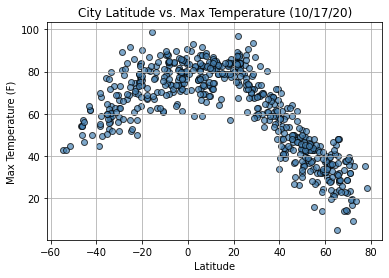

In [35]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color='steelblue', edgecolors="black", alpha=0.7)
plt.title(f'City Latitude vs. Max Temperature ({datestamp})')

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("MaxTemp_vs_Latitude.png")
plt.show()

In [69]:
#The scatter plot shows that as cities get to the equator, the warmer the temperature.

## Latitude vs. Humidity Plot

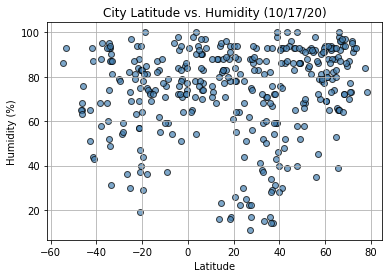

In [22]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color='steelblue', edgecolors="black", alpha=0.7)
plt.title(f'City Latitude vs. Humidity ({datestamp})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Lat_vs_Humidity.png")
plt.show()

In [70]:
# The latitude vs humidity scatter plot shows that most cities are within 30 - 100% 

## Latitude vs. Cloudiness Plot

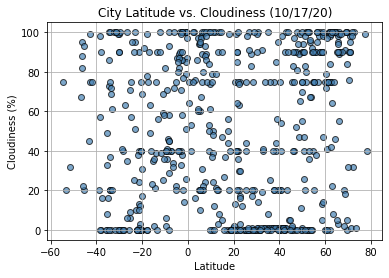

In [36]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],marker="o",color='steelblue', edgecolors="black", alpha=0.7)
plt.title(f'City Latitude vs. Cloudiness ({datestamp})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

In [71]:
# The latitude vs cloudiness scatter plot shows no strong correlation between latitude and cloudiness

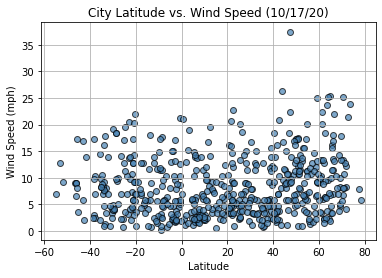

In [72]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color='steelblue', edgecolors="black", alpha=0.7)
plt.title(f'City Latitude vs. Wind Speed ({datestamp})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Lat_Vs_WindSpeed.png")
plt.show()

## Latitude vs. Wind Speed Plot

In [73]:
# The latitude vs wind speed scatter plot shows no strong correlation between latitude and wind speed. Most cities are within 0 to 20mph wind speed while some few cities are above 20mph.

## Linear Regression

In [52]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]
southern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.92x + 91.74
The r-squared is: -0.8963613928858313
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


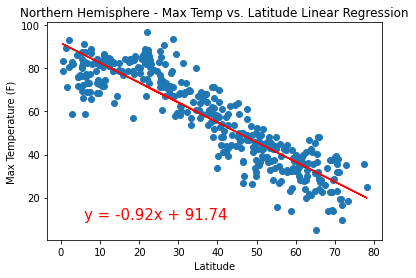

In [59]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.58x + 82.71
The r-squared is: 0.6735130273949456
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


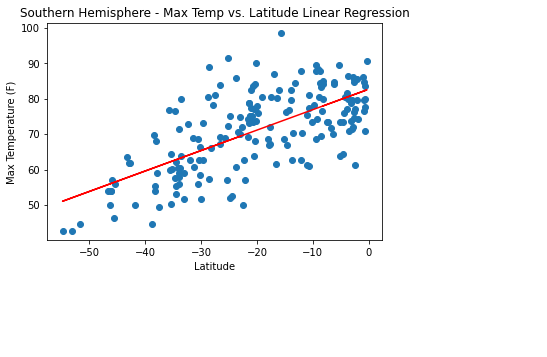

In [60]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.21x + 65.68
The r-squared is: 0.20200842292358828
The regression does not display much of a correlation between the data sets.


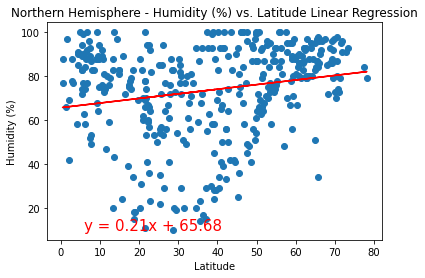

In [62]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.18x + 72.93
The r-squared is: 0.12459045129951862
The regression does not display much of a correlation between the data sets.


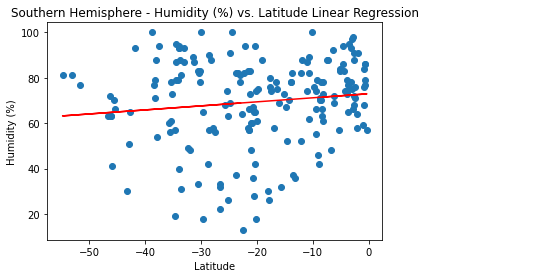

In [63]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.29x + 40.2
The r-squared is: 0.15087536128145593
The regression does not display much of a correlation between the data sets.


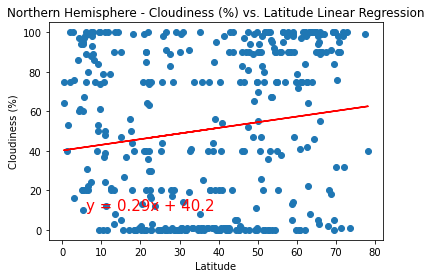

In [64]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.38x + 58.01
The r-squared is: 0.14504062069956922
The regression does not display much of a correlation between the data sets.


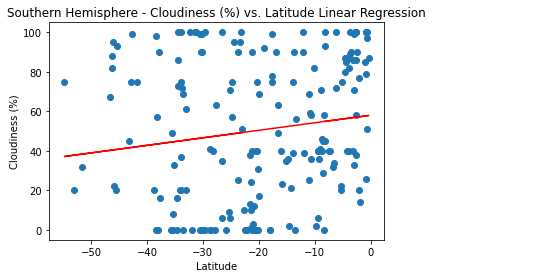

In [65]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.07x + 5.66
The r-squared is: 0.26079511659769916
The regression does not display much of a correlation between the data sets.


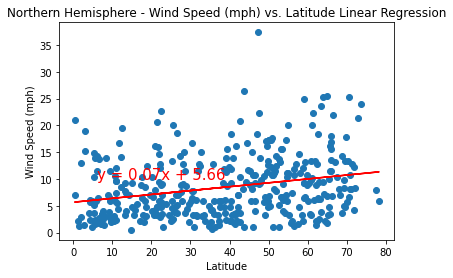

In [67]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.05x + 6.8
The r-squared is: -0.1347516821947911
The regression does not display much of a correlation between the data sets.


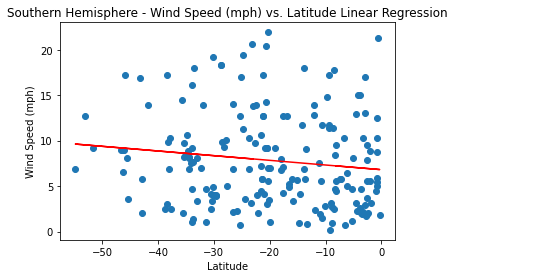

In [68]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()